# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

heroes_df.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0',axis=1,inplace=True)
heroes_df.head(25)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [6]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [167]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [7]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [8]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Flash Gordon,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [9]:
heroes_df.isna().sum()
#heroes_df.Publisher.value_counts()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [10]:
#heroes_df.Publisher.fillna('-',axis = 1,inplace=True)
#heroes_df.Weight.fillna(-99,axis=1,inplace = True)
heroes_df['Publisher'].fillna('-', inplace = True)
heroes_df['Weight'].fillna(-99, inplace = True)
heroes_df.isna().sum()
#heroes_df.head()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [11]:
heroes_df.Weight.dtype

dtype('float64')

In [12]:
for i in heroes_df.columns:
    if heroes_df[i].dtype == 'float64':
        print('{} column: {} counts of {}\n'.format(i,heroes_df[i].loc[heroes_df[i]==441].value_counts(),441))
        print('{} column: {} counts of {}\n'.format(i,heroes_df[i].loc[heroes_df[i]==-99].value_counts(),-99))
        
    else:
        print('{} column: {} counts of {}\n'.format(i,heroes_df[i].loc[heroes_df[i]=='-'].value_counts(),'-'))
        
              
# I decided to fill in the null values with a '-'. Seems like a lot of the information from other heroes is not completely 
# filled in and I would rather not delete any heroes names b/c that's not necessarily the point of the exercise.
# The most interesting aspect of the data is figuring out the most common superpowers and necessarily the features of 
# each hero.
    



name column: Series([], Name: name, dtype: int64) counts of -

Gender column: -    29
Name: Gender, dtype: int64 counts of -

Eye color column: -    172
Name: Eye color, dtype: int64 counts of -

Race column: -    304
Name: Race, dtype: int64 counts of -

Hair color column: -    172
Name: Hair color, dtype: int64 counts of -

Height column: Series([], Name: Height, dtype: int64) counts of 441

Height column: -99.0    217
Name: Height, dtype: int64 counts of -99

Publisher column: -    15
Name: Publisher, dtype: int64 counts of -

Skin color column: -    662
Name: Skin color, dtype: int64 counts of -

Alignment column: -    7
Name: Alignment, dtype: int64 counts of -

Weight column: 441.0    2
Name: Weight, dtype: int64 counts of 441

Weight column: -99.0    239
Name: Weight, dtype: int64 counts of -99



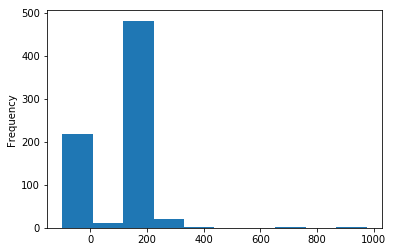

In [40]:
heroes_df.Height.plot(kind = 'hist', bins = 10)

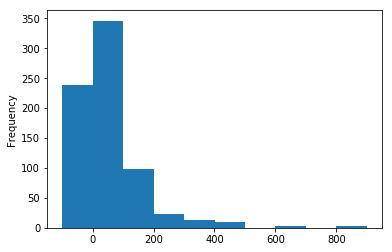

In [41]:
heroes_df.Weight.plot(kind = 'hist', bins = 10)
#heroes_df.Weight.loc [heroes_df['Weight']=='-','Weight'] = -99
#heroes_df.Weight.value_counts()
#heroes_df.Weight.fillna(-99)
#heroes_df.Weight.astype(float)
#heroes_df.Weight.plot(kind = 'hist', bins = 10)

#heroes_df.Weight.unique()

In [38]:
#len(heroes_df.loc[(heroes_df['Height']==-99 & heroes_df['Gender'] == 'Male')])
def find_placeholder (df, column, value):
    
    print ('\n'+column + ' Male data:')
    print ((len(df.loc[((df[column] == value) & (heroes_df['Gender'] == 'Male'))])
            /len(df.loc[df['Gender'] == 'Male'])))
    
    print ('\n'+column + ' Female data:')
    print ((len(df.loc[((df[column] == value) & (heroes_df['Gender'] == 'Female'))])
            /len(df.loc[df['Gender'] == 'Female'])))
    
    return 
    
    
print(len(heroes_df.loc[((heroes_df['Height'] == -99) & (heroes_df['Gender'] == 'Male'))]))
print(len(heroes_df.loc[((heroes_df['Height'] != -99) & (heroes_df['Gender'] == 'Male'))]))


print (len(heroes_df.loc[((heroes_df['Height'] == -99) & (heroes_df['Gender'] == 'Female'))]))
print (len(heroes_df.loc[((heroes_df['Height'] != -99) & (heroes_df['Gender'] == 'Female'))]))


#heroes_df.loc[heroes_df['Weight']==-99,'Weight']
#heroes_df.head()

#see how often this is irrelevant data in the Height and Weight 

147
358
56
144


In [39]:
find_placeholder (heroes_df, 'Height',-99)
find_placeholder (heroes_df, 'Weight',-99)


Height Male data:
0.29108910891089107

Height Female data:
0.28

Weight Male data:
0.3287128712871287

Weight Female data:
0.29


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [42]:
heroes_df.set_index('name',inplace=True)
powers_df.set_index('hero_names',inplace=True)
powers_df.head()


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
combined_df = heroes_df.join(powers_df)
combined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
male_df = combined_df.loc[combined_df['Gender']== 'Male']
female_df = combined_df.loc[combined_df['Gender']== 'Female']
female_df.head(25)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0,True,...,False,False,False,False,False,False,False,False,False,False
Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,False
Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0,True,...,True,False,False,False,False,False,False,False,False,False
Arclight,Female,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0,False,...,False,False,False,False,False,False,False,False,False,False
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,True,...,False,False,False,False,False,False,False,False,False,False
Ariel,Female,purple,-,Pink,165.0,Marvel Comics,-,good,59.0,False,...,False,False,False,False,False,False,False,False,False,False
Armor,Female,black,-,Black,163.0,Marvel Comics,-,good,50.0,False,...,False,False,False,False,False,False,False,False,False,False
Atom Girl,Female,black,-,Black,168.0,DC Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [47]:
#cut all the irrelevant values in the male and female databases
male_df_cut = male_df.loc[(male_df['Height'] != -99) &(male_df['Weight'] != -99)]
female_df_cut = female_df.loc[(female_df['Height'] != -99) &(female_df['Weight'] != -99)]

female_df_cut.Height.unique()

array([173. , 165. , 163. , 175. , 193. , 168. , 180. , 170. , 188. ,
       178. , 218. , 157. , 183. , 211. ,  62.5, 213. , 185. , 201. ,
       191. , 137. , 366. , 155. ])

(0, 1000)

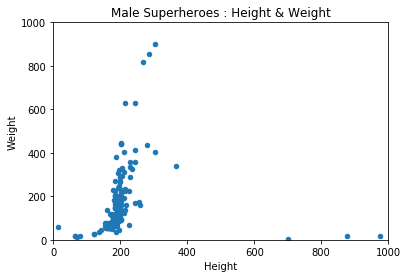

In [54]:
ax1 = male_df_cut.plot.scatter ('Height','Weight')
ax1.set_title ('Male Superheroes : Height & Weight')
ax1.set_xlim (0,1000)
ax1.set_ylim (0,1000)

(0, 1000)

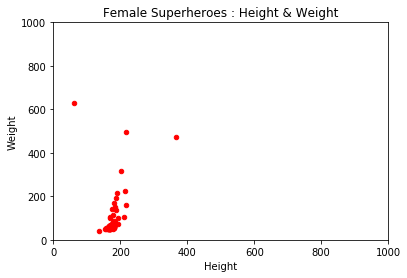

In [55]:
ax2 = female_df_cut.plot.scatter ('Height','Weight', color = 'red')
ax2.set_title ('Female Superheroes : Height & Weight')
ax2.set_xlim (0,1000)
ax2.set_ylim (0,1000)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [74]:
import seaborn as sns
def show_distplot(dataframe, gender, column_name):
    df = dataframe.loc[(dataframe['Gender']== gender),column_name]
    ax = sns.distplot(df,50)
    
    return ax

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


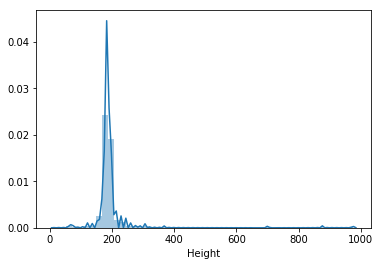

In [75]:
# Male Height
show_distplot(male_df_cut,'Male','Height')

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


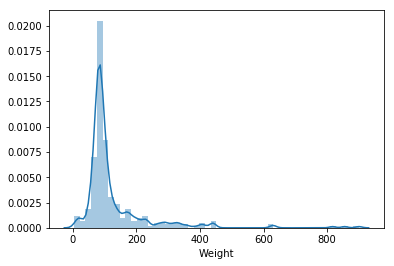

In [76]:
# Male Weight
show_distplot (male_df_cut, 'Male','Weight')

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


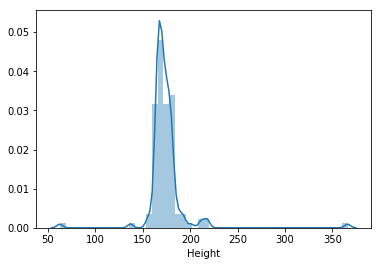

In [70]:
# Female Height
show_distplot(female_df_cut,'Female','Height')

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


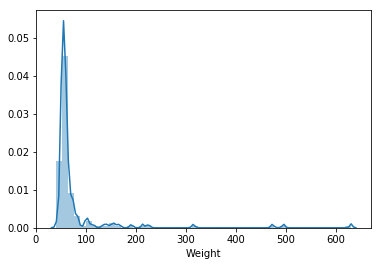

In [71]:
# Female Weight
show_distplot(female_df_cut,'Female','Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



In [78]:
#both height and weight for males and females are highly concentrated
#females height and weight are understandably less than males
#most male and female heroes fit in the same height/weight bins (fairly concentrated with outliers)

#male height - normal distribution with a few outliers, concentrated, can use median, mean, or mode
#male weight - left-skewed distribution with right fat tails, right value to use = median
#female height - normal distribution with no outliers, concentrated, can use median, mean, or mode
#female weight - left-skewed  distribution with right fat tails, right value to use = median

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [253]:
#len(combined_df.loc[combined_df['Agility']==True])

def find_val (df, c1, c1val, c2 = None, c2val = None ):
    if c2 != None:
        val = len(df.loc[(df[c1]== c1val) & (df[c2]== c2val)])/len(df)
    else:
        val = len(df.loc[(df[c1]== c1val)])/len(df)
    
    return val

In [111]:
find_val(combined_df,'Super Speed', True)

251

In [117]:
find_val (combined_df,'Super Speed', True, 'Gender', 'Male')

187

In [254]:
def top_count (df, top, c2 = None, c2val = None):
    powers_count = {}
    for i in df.columns:
        powers_count [i] = find_val (df, i,True,c2,c2val)
    
    powers_count
    top = sorted(powers_count.items(), key = lambda x:x[1], reverse = True)[0:top]
    
    return top

In [248]:
#top 5 super powers for all superheroes
top_count(combined_df,5)

[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244)]

In [249]:
#top 5 super powers for all Marvel heroes
top_count (combined_df,5, 'Publisher','Marvel Comics')

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [250]:
#top 5 super powers for all DC heroes
top_count (combined_df,5, 'Publisher','DC Comics')

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

In [127]:
#the top powers across universes are generally the same and pretty similar. They have to deal with superhuman abilities
#strength, stamina, speed, agility, etc.

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

How many superpowers does an average superhero have? And are there any stark differences between male and females?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [194]:
male_df.tail()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,95.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False
Zoom,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False


In [212]:
def hero_count (df,num):

    count = 0

    for i in df.columns:
        if df[i][num-1:num].item() == True:
            count+=1

    return count

In [213]:
hero_count(male_df,1)

7

In [214]:
hero_count(male_df,2)

16

In [215]:
#a = pd.DataFrame ({'power_count' :[0,0]})
#a.head()

def create_total (df):
    total = [ ]
    x = list(range(1,len(df)+1))
    
    for i in x:
        total.append(hero_count(df,i))
    
    return total

In [216]:
male_df['power_count'] = create_total(male_df)
female_df['power_count'] = create_total (female_df)
male_df.tail()

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,power_count
Yellow Claw,Male,blue,-,No Hair,188.0,Marvel Comics,-,bad,95.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0,False,...,False,False,False,False,False,False,False,False,False,2
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,6
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,19
Zoom,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,4


In [229]:
female_df.tail(25)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,power_count
Tempest,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,5
Thor Girl,Female,blue,Asgardian,Blond,175.0,Marvel Comics,-,good,143.0,False,...,False,False,False,False,False,False,False,False,False,8
Thundra,Female,green,-,Red,218.0,Marvel Comics,-,good,158.0,True,...,False,False,False,False,False,False,False,False,False,5
Tigra,Female,green,-,Auburn,178.0,Marvel Comics,-,good,81.0,True,...,False,False,False,False,False,False,False,False,False,6
Tracy Strauss,Female,-,-,-,-99.0,NBC - Heroes,-,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,2
Triplicate Girl,Female,purple,-,Brown,168.0,DC Comics,-,good,59.0,False,...,False,False,False,False,False,False,False,False,False,2
Ultragirl,Female,blue,-,Blond,168.0,Marvel Comics,-,good,105.0,False,...,False,False,False,False,False,False,False,False,False,8
Vagabond,Female,blue,-,Strawberry Blond,168.0,Marvel Comics,-,good,54.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Valerie Hart,Female,hazel,-,Black,175.0,Team Epic TV,-,good,56.0,True,...,False,False,False,False,False,False,False,False,False,5
Valkyrie,Female,blue,-,Blond,191.0,Marvel Comics,-,good,214.0,False,...,False,False,False,False,False,False,False,False,False,4


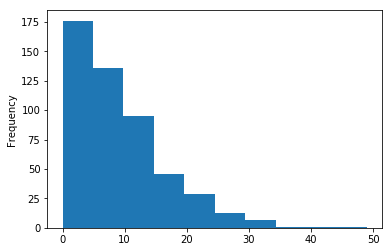

In [218]:
male_df.power_count.plot (kind = 'hist', bins = 10)

In [230]:
#remove rows with no skillsets
male_df_cut = male_df.dropna(subset=['Agility'])
male_df_cut.tail()
female_df_cut = female_df.dropna (subset=['Agility'])
female_df_cut.tail(10)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,power_count
Violet Parr,Female,violet,Human,Black,137.0,Dark Horse Comics,-,good,41.0,False,...,False,False,False,False,False,False,False,False,False,6
Vixen,Female,amber,Human,Black,175.0,DC Comics,-,good,63.0,True,...,False,False,False,False,False,False,False,False,False,17
Wasp,Female,blue,Human,Auburn,163.0,Marvel Comics,-,good,50.0,True,...,False,False,False,False,False,False,False,False,False,9
White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0,True,...,False,False,False,False,False,False,False,False,False,5
Wolfsbane,Female,green,-,Auburn,366.0,Marvel Comics,-,good,473.0,False,...,False,False,False,False,False,False,False,False,False,8
Wonder Girl,Female,blue,Demi-God,Blond,165.0,DC Comics,-,good,51.0,True,...,False,False,False,False,False,False,False,False,False,9
Wonder Woman,Female,blue,Amazon,Black,183.0,DC Comics,-,good,74.0,False,...,False,False,False,False,False,False,False,False,False,30
X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0,True,...,False,False,False,False,False,False,False,False,False,17
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,False,...,False,False,False,False,False,False,False,False,False,3
Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,False,...,False,False,False,False,False,False,False,False,False,8


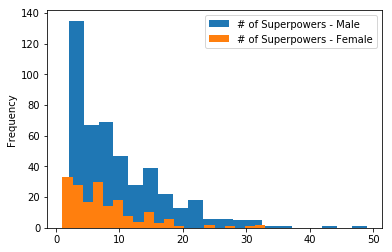

In [235]:
male_df_cut.power_count.plot (kind = 'hist', bins = 20,legend = True,label = '# of Superpowers - Male')
female_df_cut.power_count.plot (kind = 'hist', bins = 20, legend = True, label = '# of Superpowers - Female')


In [238]:
print(male_df_cut.power_count.mean())
print(female_df_cut.power_count.mean())
print(male_df_cut.power_count.median())
print(female_df_cut.power_count.median())

9.657327586206897
7.5
8.0
6.0
0    2
dtype: int64
0    1
dtype: int64


In [239]:
male_df_cut.describe()

,Height,Weight,power_count
count,464.000000,464.000000,464.000000
mean,117.084052,58.948276,9.657328
std,141.224950,139.935736,7.533728
min,-99.000000,-99.000000,2.000000
25%,-99.000000,-99.000000,4.000000
50%,183.000000,79.000000,8.000000
75%,188.000000,101.000000,14.000000
max,975.000000,900.000000,49.000000


In [243]:
female_df_cut.describe()

,Height,Weight,power_count
count,178.000000,178.000000,178.000000
mean,111.693820,36.651685,7.500000
std,117.529527,102.943800,5.960558
min,-99.000000,-99.000000,1.000000
25%,157.000000,48.250000,3.000000
50%,168.000000,54.500000,6.000000
75%,175.000000,61.000000,10.000000
max,366.000000,630.000000,33.000000


In [255]:
top_count(male_df_cut, 10)

[('Super Strength', 0.5668103448275862),
 ('Stamina', 0.47844827586206895),
 ('Durability', 0.4224137931034483),
 ('Super Speed', 0.40301724137931033),
 ('Agility', 0.3728448275862069),
 ('Flight', 0.3232758620689655),
 ('Accelerated Healing', 0.2974137931034483),
 ('Reflexes', 0.2543103448275862),
 ('Intelligence', 0.25),
 ('Energy Blasts', 0.2349137931034483)]

In [256]:
top_count(female_df_cut, 10)

[('Super Strength', 0.4943820224719101),
 ('Stamina', 0.38764044943820225),
 ('Agility', 0.3707865168539326),
 ('Durability', 0.33146067415730335),
 ('Super Speed', 0.3258426966292135),
 ('Flight', 0.30337078651685395),
 ('Reflexes', 0.29775280898876405),
 ('Accelerated Healing', 0.21348314606741572),
 ('Stealth', 0.21348314606741572),
 ('Intelligence', 0.20786516853932585)]

In [257]:
male_df_cut.loc[male_df_cut['Publisher'] == 'DC Comics',"power_count"].describe()

count    141.000000
mean      10.609929
std        8.544650
min        2.000000
25%        5.000000
50%        8.000000
75%       14.000000
max       49.000000
Name: power_count, dtype: float64

In [258]:
male_df_cut.loc[male_df_cut['Publisher'] == 'Marvel Comics',"power_count"].describe()

count    227.000000
mean       9.594714
std        6.848782
min        2.000000
25%        4.000000
50%        8.000000
75%       13.000000
max       32.000000
Name: power_count, dtype: float64

In [259]:
female_df_cut.loc[female_df_cut['Publisher'] == 'DC Comics',"power_count"].describe()

count    54.000000
mean      8.259259
std       6.590975
min       1.000000
25%       3.250000
50%       6.500000
75%      10.000000
max      30.000000
Name: power_count, dtype: float64

In [260]:
female_df_cut.loc[female_df_cut['Publisher'] == 'Marvel Comics',"power_count"].describe()

count    99.000000
mean      7.757576
std       5.303235
min       1.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      33.000000
Name: power_count, dtype: float64

In [264]:
#Question - How many superpowers does an average superhero have? And are there any stark differences between male and females?
#Males on average have significantly more powers than women (9.6 vs. 7.5)
#Top super powers for women and men are fairly similar but less percentage of women carry superpowers
#In general, DC Comics heroes have more super powers vs. Marvel Comics (and it's consistent between genders)




## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data